MACSS 30200

Assignment #1

Delores Tang

# Classification using neural networks

In [1]:
import tensorflow as tf
import keras

from keras.datasets import fashion_mnist
from keras import models, layers, regularizers
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import regularizers

from sklearn.model_selection import train_test_split

import random
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


## 1. Set your random seed to 1234

In [2]:
random.seed(1234)

## 2. Load the Fashion-MNIST dataset
#### Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Randomly split the training data into 50,000 training observations and 10,000 validation observations

In [4]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, train_size = 50000, random_state = 1234)

## 3. Implement a series of neural network models
### i. Inital Test

In [5]:
nn_init = models.Sequential()
nn_init.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
nn_init.add(layers.Dense(512, activation = 'relu'))
nn_init.add(layers.Dense(512, activation = 'relu'))
nn_init.add(layers.Dense(512, activation = 'relu'))
nn_init.add(layers.Dense(10, activation = 'softmax'))
nn_init.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
result_init = nn_init.fit(train_X, train_y, epochs = 200, batch_size = 512, 
                          validation_data = (val_X, val_y), verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


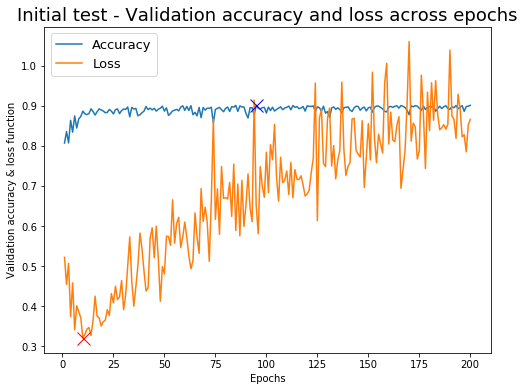

In [6]:
# Plot the validation set accuracy and loss across epochs
nn_val_acc = result_init.history['val_acc']
nn_val_loss = result_init.history['val_loss']
epochs = np.arange(1, 201)

plt.figure(figsize = (8,6))
plt.plot(epochs, nn_val_acc, label='Accuracy')
plt.plot(epochs, nn_val_loss, label='Loss')
plt.plot([np.argmax(nn_val_acc)+1], [max(nn_val_acc)], marker='x', markersize=13, color="blue")
plt.plot([np.argmin(nn_val_loss)+1], [min(nn_val_loss)], marker='x', markersize=13, color="r")
plt.ylabel('Validation accuracy & loss function')
plt.xlabel('Epochs')
plt.title('Initial test - Validation accuracy and loss across epochs', fontsize = 18)
plt.legend(loc = 2, prop={'size': 13})
plt.show()

In [7]:
print("At the "+str(np.argmax(nn_val_acc)+1)+ "th epoch, the validation accuracy reaches maximum.")
print("At the "+str(np.argmin(nn_val_loss)+1)+ "th epoch, the validation loss reaches minimum.")

At the 95th epoch, the validation accuracy reaches maximum.
At the 10th epoch, the validation loss reaches minimum.


The two numbers of epoch found by maxmizing accuracy and minimizing loss differed a lot. However, these numbers are not very informative in telling us when the model starts to degrade. As the graph shows, the accuracy reaches a stable level at around 10 epochs and vacillates slightly afterwards. But the loss keeps increasing as epoch number increases and remains to fluctuate a lot. It could mean that the model performs better as number of epochs increases, or it might be due to overfitting. 

### ii. Implement dropout

In [8]:
nn_dropout = models.Sequential()
nn_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(10, activation='softmax'))
nn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = nn_dropout.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 26us/step - loss: 0.9929 - acc: 0.6287 - val_loss: 0.5965 - val_acc: 0.7976
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.5967 - acc: 0.7845 - val_loss: 0.4991 - val_acc: 0.8151
Epoch 3/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.5146 - acc: 0.8155 - val_loss: 0.4249 - val_acc: 0.8478
Epoch 4/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.4730 - acc: 0.8326 - val_loss: 0.4539 - val_acc: 0.8244
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.4463 - acc: 0.8389 - val_loss: 0.4135 - val_acc: 0.8507
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.4335 - acc: 0.8479 - val_loss: 0.3759 - val_acc: 0.8628
Epoch 7

Epoch 57/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2880 - acc: 0.9044 - val_loss: 0.3586 - val_acc: 0.8836
Epoch 58/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2905 - acc: 0.9031 - val_loss: 0.3493 - val_acc: 0.8874
Epoch 59/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2944 - acc: 0.9024 - val_loss: 0.3325 - val_acc: 0.8935
Epoch 60/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2952 - acc: 0.9014 - val_loss: 0.3400 - val_acc: 0.8884
Epoch 61/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2921 - acc: 0.9028 - val_loss: 0.3605 - val_acc: 0.8833
Epoch 62/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2914 - acc: 0.9027 - val_loss: 0.3627 - val_acc: 0.8824
Epoch 63/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2953 - acc: 0.9023 - val_loss: 0.3381 - val_acc: 0.8927
Epoch 64/200
50000/50000 [=

Epoch 116/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3021 - acc: 0.9104 - val_loss: 0.3743 - val_acc: 0.8935
Epoch 117/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2995 - acc: 0.9113 - val_loss: 0.3619 - val_acc: 0.8906
Epoch 118/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2975 - acc: 0.9114 - val_loss: 0.3945 - val_acc: 0.8924
Epoch 119/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.3008 - acc: 0.9092 - val_loss: 0.3838 - val_acc: 0.8913
Epoch 120/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.2982 - acc: 0.9109 - val_loss: 0.3938 - val_acc: 0.8845
Epoch 121/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2994 - acc: 0.9104 - val_loss: 0.3664 - val_acc: 0.8946
Epoch 122/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2971 - acc: 0.9116 - val_loss: 0.3889 - val_acc: 0.8914
Epoch 123/200
50000/

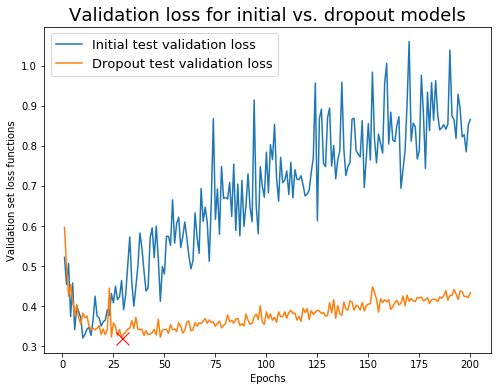

In [9]:
plt.figure(figsize = (8,6))
nn_drop_val_loss = result_dropout.history['val_loss']
plt.plot(epochs, nn_val_loss, label='Initial test validation loss')
plt.plot(epochs, nn_drop_val_loss, label='Dropout test validation loss')
plt.plot([np.argmin(nn_drop_val_loss)+1], [min(nn_drop_val_loss)], marker='x', markersize=13, color="r")
plt.ylabel('Validation set loss functions')
plt.xlabel('Epochs')
plt.legend(loc = 2, prop={'size': 13})
plt.title('Validation loss for initial vs. dropout models', fontsize = 18)
plt.show()

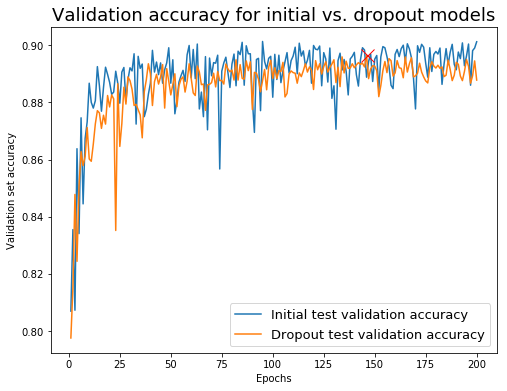

In [10]:
plt.figure(figsize = (8,6))
nn_drop_val_acc = result_dropout.history['val_acc']
plt.plot(epochs, nn_val_acc, label='Initial test validation accuracy')
plt.plot(epochs, nn_drop_val_acc, label='Dropout test validation accuracy')
plt.plot([np.argmax(nn_drop_val_acc)+1], [max(nn_drop_val_acc)], marker='x', markersize=13, color="r")
plt.ylabel('Validation set accuracy')
plt.xlabel('Epochs')
plt.legend(loc = "best", prop={'size': 13})
plt.title('Validation accuracy for initial vs. dropout models', fontsize = 18)
plt.show()

In [11]:
print("For the model with dropouts, at the "+str(np.argmin(nn_drop_val_loss)+1)+ "th epoch, the validation loss reaches minimum.")

For the model with dropouts, at the 29th epoch, the validation loss reaches minimum.


Using the dropout techniques made the loss curve more steady over epochs. It potentially reduces overfitting. According to the validation loss of the dropout model, the validation first decreases until it gets near 30 epochs. At around 32th epoch, the validation loss reaches minimum. It increases again but just slightly as the number of epochs increases. However, the two models are not much different in their validation accuracy curves. The dropout curve is a little more stable than the initial model's curve. 

### iii. Weight regularization
#### L1 Regulation

In [12]:
nn_l1 = models.Sequential()
nn_l1.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(28 * 28,)))
nn_l1.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
nn_l1.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
nn_l1.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
nn_l1.add(layers.Dense(10, activation='softmax'))

nn_l1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result_l1 = nn_l1.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 26us/step - loss: 14.6342 - acc: 0.5412 - val_loss: 4.1125 - val_acc: 0.6193
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 3.0848 - acc: 0.6455 - val_loss: 2.3958 - val_acc: 0.6976
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 2.2210 - acc: 0.6961 - val_loss: 2.0296 - val_acc: 0.7182
Epoch 4/200
50000/50000 [==============================] - 1s 17us/step - loss: 1.9233 - acc: 0.7266 - val_loss: 1.8483 - val_acc: 0.7257
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 1.7638 - acc: 0.7467 - val_loss: 1.7725 - val_acc: 0.7079
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.6661 - acc: 0.7582 - val_loss: 1.6162 - val_acc: 0.7776
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.5924 - acc: 0.7699 - val_loss: 1.5354 -

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 1.1697 - acc: 0.8478 - val_loss: 1.2234 - val_acc: 0.8293
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.1689 - acc: 0.8472 - val_loss: 1.2538 - val_acc: 0.8130
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.1655 - acc: 0.8484 - val_loss: 1.1872 - val_acc: 0.8414
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.1686 - acc: 0.8460 - val_loss: 1.2394 - val_acc: 0.8185
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.1669 - acc: 0.8472 - val_loss: 1.2765 - val_acc: 0.8068
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.1690 - acc: 0.8465 - val_loss: 1.2141 - val_acc: 0.8279
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.1651 - acc: 0.8480 - val_loss: 1.2150 - val_acc: 0.8302
Epoch 125/200
50000/

In [13]:
nn_l2 = models.Sequential()
nn_l2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
nn_l2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
nn_l2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
nn_l2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
nn_l2.add(layers.Dense(10, activation='softmax'))

nn_l2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result_l2 = nn_l2.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 29us/step - loss: 2.2061 - acc: 0.6566 - val_loss: 1.6878 - val_acc: 0.6528
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 1.2236 - acc: 0.7800 - val_loss: 1.0071 - val_acc: 0.8069
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9084 - acc: 0.8118 - val_loss: 0.9743 - val_acc: 0.7728
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.7654 - acc: 0.8240 - val_loss: 0.6857 - val_acc: 0.8431
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.6777 - acc: 0.8350 - val_loss: 0.6746 - val_acc: 0.8231
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.6207 - acc: 0.8418 - val_loss: 0.6315 - val_acc: 0.8287
Epoch 7/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.5833 - acc: 0.8470 - val_loss: 0.8135 - 

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3245 - acc: 0.9146 - val_loss: 0.4372 - val_acc: 0.8812
Epoch 119/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3291 - acc: 0.9121 - val_loss: 0.4317 - val_acc: 0.8792
Epoch 120/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3294 - acc: 0.9116 - val_loss: 0.4235 - val_acc: 0.8802
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3259 - acc: 0.9136 - val_loss: 0.4459 - val_acc: 0.8714
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3256 - acc: 0.9144 - val_loss: 0.4778 - val_acc: 0.8639
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3269 - acc: 0.9133 - val_loss: 0.4091 - val_acc: 0.8874
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3269 - acc: 0.9119 - val_loss: 0.5118 - val_acc: 0.8498
Epoch 125/200
50000/

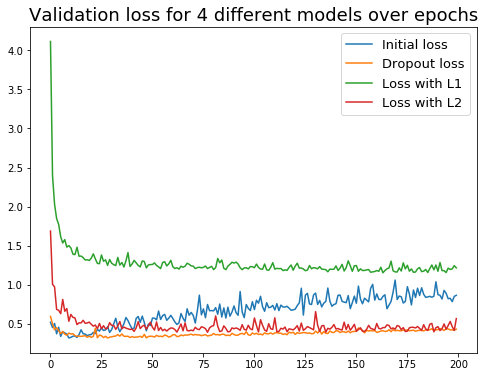

In [14]:
nn_val_loss = result_init.history['val_loss']
nn_drop_val_loss = result_dropout.history['val_loss']
l1_loss = result_l1.history['val_loss']
l2_loss = result_l2.history['val_loss']

plt.figure(figsize = (8,6))
plt.plot(nn_val_loss)
plt.plot(nn_drop_val_loss)
plt.plot(l1_loss)
plt.plot(l2_loss)
plt.legend(['Initial loss', 'Dropout loss', 'Loss with L1', 'Loss with L2'], loc='best', prop={'size': 13})
plt.title('Validation loss for 4 different models over epochs', fontsize = 18)
plt.show()

The graph shows that the dropout model in general has the best performances over the four different models. The model with L2 regularization is also close in performance. 

#### iv. Alternative models

As the model with l2 regularization had the best performance above, I would use its parameters as default for further tunning. 

Default model:
Layers = 5
Units = 512
Optimizer = rmsprop
batch_size = 512 
epochs = 200
l2 = 0.01

In [15]:
# Model 1: 
## Layers = 7
## Units = 512
## Optimizer = rmsprop
## batch_size = 512 
## epochs = 200

mod1 = models.Sequential()
mod1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod1.add(layers.Dense(10, activation='softmax'))

mod1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod1 = mod1.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 37us/step - loss: 2.7947 - acc: 0.5725 - val_loss: 1.6503 - val_acc: 0.7432
Epoch 2/200
50000/50000 [==============================] - 1s 21us/step - loss: 1.3874 - acc: 0.7531 - val_loss: 1.0760 - val_acc: 0.8100
Epoch 3/200
50000/50000 [==============================] - 1s 22us/step - loss: 1.0037 - acc: 0.7912 - val_loss: 0.8932 - val_acc: 0.8115
Epoch 4/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.8300 - acc: 0.8120 - val_loss: 0.7596 - val_acc: 0.8204
Epoch 5/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.7497 - acc: 0.8218 - val_loss: 0.7692 - val_acc: 0.8085
Epoch 6/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.6903 - acc: 0.8308 - val_loss: 0.6328 - val_acc: 0.8357
Epoch 7/200
50000/50000 [==============================] - 1s 21us/step - loss: 0.6429 - acc: 0.8373 - val_loss: 0.6670 - 

Epoch 118/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.3578 - acc: 0.9093 - val_loss: 0.4412 - val_acc: 0.8772
Epoch 119/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.3572 - acc: 0.9086 - val_loss: 0.4504 - val_acc: 0.8754
Epoch 120/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.3540 - acc: 0.9099 - val_loss: 0.4376 - val_acc: 0.8817
Epoch 121/200
50000/50000 [==============================] - 1s 21us/step - loss: 0.3515 - acc: 0.9117 - val_loss: 0.5322 - val_acc: 0.8500
Epoch 122/200
50000/50000 [==============================] - 1s 21us/step - loss: 0.3543 - acc: 0.9101 - val_loss: 0.4547 - val_acc: 0.8786
Epoch 123/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.3551 - acc: 0.9095 - val_loss: 0.4542 - val_acc: 0.8763
Epoch 124/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.3519 - acc: 0.9112 - val_loss: 0.5366 - val_acc: 0.8480
Epoch 125/200
50000/

In [ ]:
# Model 2: 
## Layers = 7
## Units = 512
## Optimizer = SGD
## batch_size = 512 
## epochs = 200

mod2 = models.Sequential()
mod2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod2.add(layers.Dense(10, activation='softmax'))

mod2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod2 = mod2.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

In [17]:
# Model 3: 
## Layers = 7
## Units = 128
## Optimizer = SGD
## batch_size = 512 
## epochs = 200

mod3 = models.Sequential()
mod3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod3.add(layers.Dense(10, activation='softmax'))

mod3.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod3 = mod3.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 26us/step - loss: 3.1017 - acc: 0.1970 - val_loss: 3.0252 - val_acc: 0.2572
Epoch 2/200
50000/50000 [==============================] - 1s 11us/step - loss: 2.8446 - acc: 0.3757 - val_loss: 2.5712 - val_acc: 0.5548
Epoch 3/200
50000/50000 [==============================] - 1s 11us/step - loss: 2.2209 - acc: 0.6077 - val_loss: 1.9559 - val_acc: 0.6371
Epoch 4/200
50000/50000 [==============================] - 1s 11us/step - loss: 1.8213 - acc: 0.6649 - val_loss: 1.7530 - val_acc: 0.6684
Epoch 5/200
50000/50000 [==============================] - 1s 11us/step - loss: 1.7012 - acc: 0.6889 - val_loss: 1.6613 - val_acc: 0.7062
Epoch 6/200
50000/50000 [==============================] - 1s 11us/step - loss: 1.6435 - acc: 0.7090 - val_loss: 1.6293 - val_acc: 0.7027
Epoch 7/200
50000/50000 [==============================] - 1s 12us/step - loss: 1.5929 - acc: 0.7278 - val_loss: 1.5729 - 

Epoch 118/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.9060 - acc: 0.8908 - val_loss: 0.9514 - val_acc: 0.8701
Epoch 119/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.9081 - acc: 0.8889 - val_loss: 0.9677 - val_acc: 0.8617
Epoch 120/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.9045 - acc: 0.8898 - val_loss: 0.9728 - val_acc: 0.8613
Epoch 121/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.8995 - acc: 0.8898 - val_loss: 0.9524 - val_acc: 0.8687
Epoch 122/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.8950 - acc: 0.8923 - val_loss: 0.9505 - val_acc: 0.8674
Epoch 123/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.8937 - acc: 0.8923 - val_loss: 0.9598 - val_acc: 0.8666
Epoch 124/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.8949 - acc: 0.8915 - val_loss: 0.9420 - val_acc: 0.8698
Epoch 125/200
50000/

In [18]:
# Model 4: 
## Layers = 5
## Units = 128
## Optimizer = rmsprop
## batch_size = 512 
## epochs = 200

mod4 = models.Sequential()
mod4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod4.add(layers.Dense(10, activation='softmax'))

mod4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod4 = mod4.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 30us/step - loss: 1.3076 - acc: 0.6920 - val_loss: 1.0740 - val_acc: 0.7263
Epoch 2/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.9159 - acc: 0.8007 - val_loss: 0.8350 - val_acc: 0.8279
Epoch 3/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.8052 - acc: 0.8277 - val_loss: 0.8296 - val_acc: 0.8076
Epoch 4/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.7334 - acc: 0.8387 - val_loss: 0.7494 - val_acc: 0.8242
Epoch 5/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.6888 - acc: 0.8451 - val_loss: 0.7479 - val_acc: 0.8115
Epoch 6/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.6488 - acc: 0.8513 - val_loss: 0.6610 - val_acc: 0.8459
Epoch 7/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.6204 - acc: 0.8538 - val_loss: 0.6482 - 

Epoch 118/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.3358 - acc: 0.9111 - val_loss: 0.4489 - val_acc: 0.8745
Epoch 119/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.3352 - acc: 0.9114 - val_loss: 0.4354 - val_acc: 0.8797
Epoch 120/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.3337 - acc: 0.9125 - val_loss: 0.4517 - val_acc: 0.8726
Epoch 121/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.3372 - acc: 0.9106 - val_loss: 0.4629 - val_acc: 0.8670
Epoch 122/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3393 - acc: 0.9094 - val_loss: 0.4057 - val_acc: 0.8886
Epoch 123/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3296 - acc: 0.9126 - val_loss: 0.4856 - val_acc: 0.8605
Epoch 124/200
50000/50000 [==============================] - 1s 12us/step - loss: 0.3325 - acc: 0.9118 - val_loss: 0.4104 - val_acc: 0.8890
Epoch 125/200
50000/

In [26]:
# Model 5: 
## Layers = 5
## Units = 512
## Optimizer = rmsprop
## batch_size = 128 
## epochs = 200

mod5 = models.Sequential()
mod5.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod5.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod5.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod5.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod5.add(layers.Dense(10, activation='softmax'))

mod5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod5 = mod5.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 80us/step - loss: 1.3601 - acc: 0.7535 - val_loss: 0.7560 - val_acc: 0.8268
Epoch 2/200
50000/50000 [==============================] - 3s 51us/step - loss: 0.6907 - acc: 0.8254 - val_loss: 0.6088 - val_acc: 0.8386
Epoch 3/200
50000/50000 [==============================] - 3s 51us/step - loss: 0.5793 - acc: 0.8416 - val_loss: 0.6775 - val_acc: 0.8122
Epoch 4/200
50000/50000 [==============================] - 3s 50us/step - loss: 0.5322 - acc: 0.8509 - val_loss: 0.6408 - val_acc: 0.8141
Epoch 5/200
50000/50000 [==============================] - 2s 50us/step - loss: 0.5020 - acc: 0.8572 - val_loss: 0.5401 - val_acc: 0.8340
Epoch 6/200
50000/50000 [==============================] - 2s 50us/step - loss: 0.4817 - acc: 0.8624 - val_loss: 0.5381 - val_acc: 0.8404
Epoch 7/200
50000/50000 [==============================] - 2s 50us/step - loss: 0.4685 - acc: 0.8666 - val_loss: 0.4980 - 

Epoch 118/200
50000/50000 [==============================] - 2s 49us/step - loss: 0.3446 - acc: 0.9058 - val_loss: 0.5140 - val_acc: 0.8455
Epoch 119/200
50000/50000 [==============================] - 3s 50us/step - loss: 0.3427 - acc: 0.9039 - val_loss: 0.4553 - val_acc: 0.8721
Epoch 120/200
50000/50000 [==============================] - 2s 49us/step - loss: 0.3438 - acc: 0.9035 - val_loss: 0.5171 - val_acc: 0.8562
Epoch 121/200
50000/50000 [==============================] - 2s 50us/step - loss: 0.3424 - acc: 0.9042 - val_loss: 0.4361 - val_acc: 0.8743
Epoch 122/200
50000/50000 [==============================] - 3s 50us/step - loss: 0.3445 - acc: 0.9032 - val_loss: 0.5288 - val_acc: 0.8495
Epoch 123/200
50000/50000 [==============================] - 3s 51us/step - loss: 0.3439 - acc: 0.9028 - val_loss: 0.4579 - val_acc: 0.8663
Epoch 124/200
50000/50000 [==============================] - 3s 50us/step - loss: 0.3416 - acc: 0.9035 - val_loss: 0.4585 - val_acc: 0.8693
Epoch 125/200
50000/

In [20]:
# Model 6: 
## Layers = 5
## Units = 512
## Optimizer = rmsprop
## batch_size = 128 
## epochs = 50

mod6 = models.Sequential()
mod6.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod6.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod6.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod6.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod6.add(layers.Dense(10, activation='softmax'))

mod6.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod6 = mod6.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=50, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3535 - acc: 0.7517 - val_loss: 0.7935 - val_acc: 0.8084
Epoch 2/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.6917 - acc: 0.8236 - val_loss: 0.6495 - val_acc: 0.8227
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.5829 - acc: 0.8407 - val_loss: 0.5700 - val_acc: 0.8412
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5359 - acc: 0.8497 - val_loss: 0.5445 - val_acc: 0.8396
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5065 - acc: 0.8553 - val_loss: 0.5443 - val_acc: 0.8355
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.4843 - acc: 0.8606 - val_loss: 0.5553 - val_acc: 0.8298
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.4696 - acc: 0.8660 - val_loss: 0.5140 - val_acc

In [21]:
# Model 7: 
## Layers = 5
## Units = 512
## Optimizer = sgd
## batch_size = 512 
## epochs = 50

mod7 = models.Sequential()
mod7.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
mod7.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod7.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod7.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
mod7.add(layers.Dense(10, activation='softmax'))

mod7.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
result_mod7 = mod7.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=50, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 36us/step - loss: 4.1014 - acc: 0.4804 - val_loss: 3.6626 - val_acc: 0.6422
Epoch 2/50
50000/50000 [==============================] - 1s 14us/step - loss: 3.3177 - acc: 0.6714 - val_loss: 3.1026 - val_acc: 0.6921
Epoch 3/50
50000/50000 [==============================] - 1s 14us/step - loss: 2.9912 - acc: 0.7231 - val_loss: 2.9304 - val_acc: 0.7334
Epoch 4/50
50000/50000 [==============================] - 1s 14us/step - loss: 2.8704 - acc: 0.7558 - val_loss: 2.8621 - val_acc: 0.7411
Epoch 5/50
50000/50000 [==============================] - 1s 15us/step - loss: 2.8001 - acc: 0.7754 - val_loss: 2.7850 - val_acc: 0.7766
Epoch 6/50
50000/50000 [==============================] - 1s 15us/step - loss: 2.7473 - acc: 0.7901 - val_loss: 2.7441 - val_acc: 0.7857
Epoch 7/50
50000/50000 [==============================] - 1s 14us/step - loss: 2.7127 - acc: 0.7957 - val_loss: 2.7087 - val_acc

In [22]:
# Model 8: 
## Layers = 5
## Units = 512
## Optimizer = rmsprop
## batch_size = 512 
## epochs = 200
## dropout_rate = 0.3

mod8 = models.Sequential()
mod8.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mod8.add(layers.Dropout(0.3))
mod8.add(layers.Dense(512, activation='relu'))
mod8.add(layers.Dropout(0.3))
mod8.add(layers.Dense(512, activation='relu'))
mod8.add(layers.Dropout(0.3))
mod8.add(layers.Dense(512, activation='relu'))
mod8.add(layers.Dropout(0.3))
mod8.add(layers.Dense(10, activation='softmax'))
mod8.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_mod8 = mod8.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 41us/step - loss: 0.8895 - acc: 0.6732 - val_loss: 0.6613 - val_acc: 0.7771
Epoch 2/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.5409 - acc: 0.8048 - val_loss: 0.4739 - val_acc: 0.8288
Epoch 3/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.4798 - acc: 0.8245 - val_loss: 0.4255 - val_acc: 0.8405
Epoch 4/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.4285 - acc: 0.8439 - val_loss: 0.4238 - val_acc: 0.8440
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.4016 - acc: 0.8540 - val_loss: 0.3977 - val_acc: 0.8458
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3766 - acc: 0.8622 - val_loss: 0.3758 - val_acc: 0.8550
Epoch 7/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3631 - acc: 0.8677 - val_loss: 0.3685 - 

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2052 - acc: 0.9360 - val_loss: 0.3812 - val_acc: 0.8968
Epoch 119/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2042 - acc: 0.9368 - val_loss: 0.3673 - val_acc: 0.8962
Epoch 120/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1987 - acc: 0.9383 - val_loss: 0.3738 - val_acc: 0.8964
Epoch 121/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2048 - acc: 0.9358 - val_loss: 0.3929 - val_acc: 0.8947
Epoch 122/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1982 - acc: 0.9380 - val_loss: 0.3937 - val_acc: 0.8955
Epoch 123/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2006 - acc: 0.9389 - val_loss: 0.4128 - val_acc: 0.8983
Epoch 124/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1984 - acc: 0.9417 - val_loss: 0.4451 - val_acc: 0.8894
Epoch 125/200
50000/

In [23]:
# Model 9: 
## Layers = 7
## Units = 512
## Optimizer = rmsprop
## batch_size = 512 
## epochs = 200
## dropout_rate = 0.3

mod9 = models.Sequential()
mod9.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mod9.add(layers.Dropout(0.3))
mod9.add(layers.Dense(512, activation='relu'))
mod9.add(layers.Dropout(0.3))
mod9.add(layers.Dense(512, activation='relu'))
mod9.add(layers.Dropout(0.3))
mod9.add(layers.Dense(512, activation='relu'))
mod9.add(layers.Dropout(0.3))
mod9.add(layers.Dense(512, activation='relu'))
mod9.add(layers.Dropout(0.3))
mod9.add(layers.Dense(512, activation='relu'))
mod9.add(layers.Dropout(0.3))
mod9.add(layers.Dense(10, activation='softmax'))
mod9.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_mod9 = mod9.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.1752 - acc: 0.5674 - val_loss: 0.6108 - val_acc: 0.7719
Epoch 2/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.6239 - acc: 0.7723 - val_loss: 0.4787 - val_acc: 0.8298
Epoch 3/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.5126 - acc: 0.8173 - val_loss: 0.6021 - val_acc: 0.7869
Epoch 4/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.4679 - acc: 0.8302 - val_loss: 0.4478 - val_acc: 0.8382
Epoch 5/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.4305 - acc: 0.8462 - val_loss: 0.4028 - val_acc: 0.8557
Epoch 6/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.4138 - acc: 0.8499 - val_loss: 0.3986 - val_acc: 0.8553
Epoch 7/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.3934 - acc: 0.8593 - val_loss: 0.3807 - 

Epoch 118/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.9578 - acc: 0.8646 - val_loss: 0.5208 - val_acc: 0.8777
Epoch 119/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.6906 - acc: 0.8810 - val_loss: 0.5051 - val_acc: 0.8808
Epoch 120/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.6162 - acc: 0.8856 - val_loss: 0.4846 - val_acc: 0.8880
Epoch 121/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.5972 - acc: 0.8852 - val_loss: 0.5256 - val_acc: 0.8815
Epoch 122/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.6326 - acc: 0.8851 - val_loss: 0.5105 - val_acc: 0.8879
Epoch 123/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.6817 - acc: 0.8823 - val_loss: 0.5505 - val_acc: 0.8857
Epoch 124/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.7796 - acc: 0.8740 - val_loss: 0.5633 - val_acc: 0.8809
Epoch 125/200
50000/

In [24]:
# Model 10: 
## Layers = 5
## Units = 512
## Optimizer = rmsprop
## batch_size = 128 
## epochs = 200
## dropout_rate = 0.3

mod10 = models.Sequential()
mod10.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mod10.add(layers.Dropout(0.3))
mod10.add(layers.Dense(512, activation='relu'))
mod10.add(layers.Dropout(0.3))
mod10.add(layers.Dense(512, activation='relu'))
mod10.add(layers.Dropout(0.3))
mod10.add(layers.Dense(512, activation='relu'))
mod10.add(layers.Dropout(0.3))
mod10.add(layers.Dense(10, activation='softmax'))
mod10.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_mod10 = mod10.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 75us/step - loss: 0.6778 - acc: 0.7522 - val_loss: 0.4638 - val_acc: 0.8282
Epoch 2/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.4792 - acc: 0.8313 - val_loss: 0.6192 - val_acc: 0.7726
Epoch 3/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.4422 - acc: 0.8455 - val_loss: 0.4696 - val_acc: 0.8326
Epoch 4/200
50000/50000 [==============================] - 2s 49us/step - loss: 0.4353 - acc: 0.8508 - val_loss: 0.3878 - val_acc: 0.8599
Epoch 5/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.4359 - acc: 0.8523 - val_loss: 0.4266 - val_acc: 0.8539
Epoch 6/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.4380 - acc: 0.8565 - val_loss: 0.3951 - val_acc: 0.8672
Epoch 7/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.4336 - acc: 0.8567 - val_loss: 0.3827 - 

Epoch 118/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.0449 - acc: 0.8319 - val_loss: 0.8193 - val_acc: 0.8530
Epoch 119/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.0549 - acc: 0.8306 - val_loss: 0.8752 - val_acc: 0.8285
Epoch 120/200
50000/50000 [==============================] - 3s 51us/step - loss: 0.9963 - acc: 0.8333 - val_loss: 0.8354 - val_acc: 0.8566
Epoch 121/200
50000/50000 [==============================] - 3s 52us/step - loss: 1.0074 - acc: 0.8359 - val_loss: 0.8591 - val_acc: 0.8331
Epoch 122/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.0587 - acc: 0.8203 - val_loss: 0.8341 - val_acc: 0.8365
Epoch 123/200
50000/50000 [==============================] - 3s 52us/step - loss: 1.1023 - acc: 0.8224 - val_loss: 0.9066 - val_acc: 0.8435
Epoch 124/200
50000/50000 [==============================] - 3s 50us/step - loss: 1.1358 - acc: 0.8234 - val_loss: 0.9225 - val_acc: 0.8463
Epoch 125/200
50000/

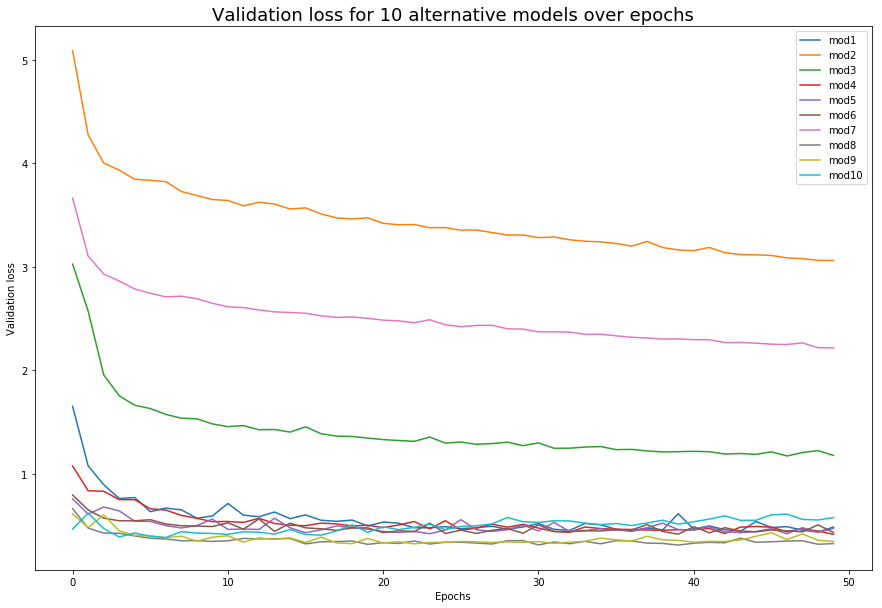

In [30]:
# Calculate and plot losses
models_lst = ["mod1", "mod2", "mod3", "mod4", "mod5", "mod6", "mod7", "mod8", "mod9", "mod10"]

val_loss = []
val_loss.append(result_mod1.history['val_loss'])
val_loss.append(result_mod2.history['val_loss'])
val_loss.append(result_mod3.history['val_loss'])
val_loss.append(result_mod4.history['val_loss'])
val_loss.append(result_mod5.history['val_loss'])
val_loss.append(result_mod6.history['val_loss'])
val_loss.append(result_mod7.history['val_loss'])
val_loss.append(result_mod8.history['val_loss'])
val_loss.append(result_mod9.history['val_loss'])
val_loss.append(result_mod10.history['val_loss'])

plt.figure(figsize = (15, 10))
for i in range(10):
    plt.plot(val_loss[i][:50])

plt.legend(models_lst, loc='best')
plt.title('Validation loss for 10 alternative models over epochs', fontsize = 18)
plt.ylabel("Validation loss")
plt.xlabel("Epochs")
plt.show()

The graph of first 50 epochs show that model 8, 9 and 10 are very close in performances. 

In [35]:
avg_loss_1st = [0 for _ in range(10)]
min_loss_1st = [0 for _ in range(10)]

In [40]:
for i in range(10):
    avg_loss_1st[i] = np.mean(val_loss[i])
    min_loss_1st[i] = min(val_loss[i])

print("Model"+str(avg_loss_1st.index(min(avg_loss_1st))+1) + " gives the lowest average validation loss.")
print("Model"+str(min_loss_1st.index(min(min_loss_1st))+1) + " gives the lowest minimum validation loss.")

Model8 gives the lowest average validation loss.
Model8 gives the lowest minimum validation loss.


In [42]:
loss_data = [models_lst, avg_loss_1st, min_loss_1st]
loss_df = pd.DataFrame(loss_data)
loss_df

,0,1,2,3,4,5,6,7,8,9
0,mod1,mod2,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10
1,0.499777,2.65472,1.07242,0.4696,0.469463,0.482107,2.49518,0.389138,0.561122,0.813982
2,0.422894,1.84718,0.800911,0.394772,0.408713,0.415196,2.21559,0.309483,0.321757,0.382693


I will select mod8 as the best model as its average loss and minimum loss are both the smallest amongst all models tested.

### 4. Final Model

Model 8: 

Layers = 5

Units = 512

Optimizer = rmsprop

batch_size = 512 

epochs = 200

dropout_rate = 0.3

In [66]:
# Fit on the whole training set
mod8_all_train = mod8.fit(X_train, y_train, epochs=200, batch_size=512, verbose =0)

In [73]:
mod8_val_loss = result_mod8.history["val_loss"]
all_train_loss = mod8_all_train.history["loss"]

In [74]:
# Evaluate on test set
mod8_eval = mod8.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/step


In [75]:
print("Validation loss: "+str(np.mean(mod8_val_loss)))
print("Loss over all training set: "+str(np.mean(all_train_loss)))
print("Test loss: "+str(mod8_eval[0]))

Validation loss: 0.3891375965416431
Loss over all training set: 0.9520158251533906
Test loss: 1.1901789130449294


In [77]:
mod8_val_acc = result_mod8.history["val_acc"]
all_train_acc = mod8_all_train.history["acc"]
print("Validation accuracy: "+str(np.mean(mod8_val_acc)))
print("Accuracy over all training set: "+str(np.mean(all_train_acc)))
print("Test accuracy: "+str(mod8_eval[1]))

Validation accuracy: 0.8909529998116494
Accuracy over all training set: 0.9070601666653951
Test accuracy: 0.87


The model did not perform very well as the loss increased from about 0.39 for validation to over 1 for test. This could be due to overfitting as mod8 is a very complex model, which led to overfitting. Also, the accuracy rate is lower for the test set, although it is still a relatively high accuracy rate.